In [19]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\kterri3\\Documents\\Git Repositories'

In [32]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
#from sklearn.cluster import TSNE

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'umap'

Data Preprocessing

In [21]:
#Load Data
df = pd.read_excel('C:\\Users\kterri3\Documents\Git Repositories\hw\CHE4230HW\che4230_hw\Project Stuff\RawData.xlsx')
# print(df)

In [ ]:
#Fill empty data with mean values
df.describe()
df.shape
df.isnull().sum().sum()
df_mean = df.fillna(df.mean(), inplace= True)
df.isnull().sum().sum()
df_drop_dup = df.drop_duplicates()
df.fillna(0)

In [23]:
x_train, x_test = train_test_split(df, test_size = 0.2, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.2, random_state=42)

print(len(x_train2))
print(len(x_test))
print(len(x_val))

1276
399
320


In [24]:
scaler = StandardScaler().fit(x_train2)
df_scaled = scaler.transform(x_train2)
df_scaled

array([[-1.67145683,  0.23967528, -0.76258687, ..., -0.4173564 ,
        -0.25319069,  0.        ],
       [-0.45492226, -0.03969446,  0.62022694, ...,  0.00707758,
        -0.01914925,  0.        ],
       [-1.46033703,  0.38006655,  0.02196928, ...,  0.26694504,
        -0.55188369,  0.        ],
       ...,
       [ 0.91043446, -0.07277319, -0.60448213, ..., -0.15173518,
        -1.30327117,  0.        ],
       [ 0.85678926,  1.08916544, -1.8745954 , ..., -0.71685255,
        -0.87620222,  0.        ],
       [-1.69741418,  0.14387656, -0.47997142, ..., -0.4244149 ,
         0.43516833,  0.        ]])

In [26]:
#def log_transform(x):
    #return np.log(x + 1)

#df_log = log_transform(df_scaled)
#df_log

Dimensionality Reduction

In [36]:
#Using PCA
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)

Text(0.5, 1.0, 'Principal Component Analysis')

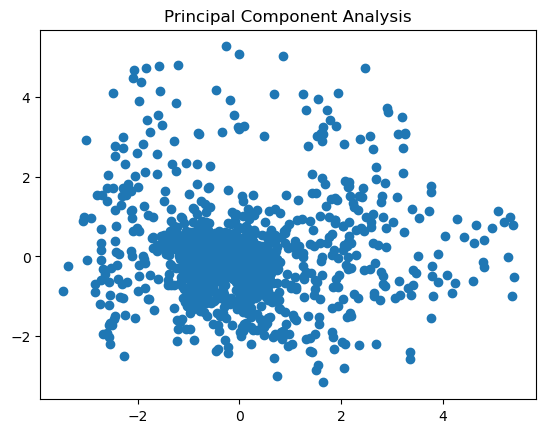

In [28]:
#Projecting the PCA result
plt.scatter(df_pca[:,5], df_pca[:,6])
plt.title("Principal Component Analysis")

In [37]:
#using tSNE
#tSNE
tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(df_scaled)

c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\kterri3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


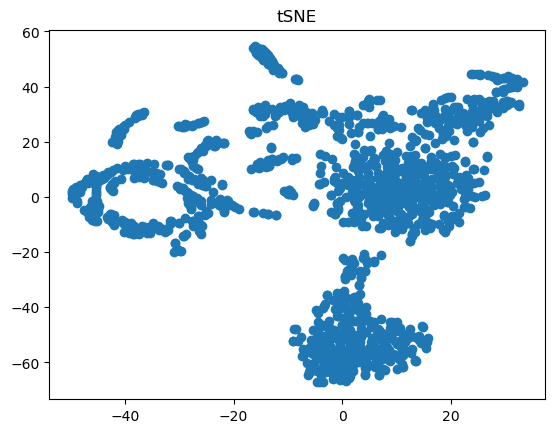

In [38]:
plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

In [ ]:
#using UMAP
#umap
#reducer = umap.UMAP()
#data_UMAP = reducer.fit_transform(df_scaled)

In [ ]:
#using PACMAP

In [ ]:
#using ICA/Spectral Embedding/ Trimap

Clustering

In [43]:
dbscan_cluster = DBSCAN(eps = 4, min_samples = 4).fit(df_pca)